In [106]:
import pandas as pd
import datetime, time
import seaborn as sns
import matplotlib.pyplot as plt
# Импорт библиотек

In [80]:
df = pd.read_csv("train_ses.csv", index_col="session_id")
# Считываение обучающего набора данных
df = pd.read_csv("test_ses.csv", index_col="session_id")
# Считываение тестового набора данных
sites = pd.read_pickle('site.pkl')
# Считывание словаря сайтов

In [81]:
df.head()
# Оценим считанные данные

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,2014-02-22 11:19:51,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,2013-12-16 16:40:19,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,2014-03-28 10:54:12,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,2014-02-28 10:55:23,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0


In [90]:
sitesDataFrame = pd.DataFrame().from_dict({v: k for k, v in sites.items()} ,orient='index',columns=['site']).sort_index()
sitesDataFrame
# Сформируем датафрейм по списку сайтов
# Оценим считанные данные

,site
1,fpdownload2.macromedia.com
2,hotmail.fr
3,login.live.com
4,mail.live.com
5,dub122.mail.live.com
...,...
48367,www.mathjax.org
48368,lemonde-educ.blog.lemonde.fr
48369,evcs-crl.ws.symantec.com
48370,www.tunisie.campusfrance.org


### Подготовка данных

In [83]:
sorted(sites.values())
# Индексация сайтов начинается с 1

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [84]:
df.info()
# Все данные различных форматов, необходимо преобразовать их в целочисленные

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253561 entries, 1 to 253561
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   site1   253561 non-null  int64  
 1   time1   253561 non-null  object 
 2   site2   250098 non-null  float64
 3   time2   250098 non-null  object 
 4   site3   246919 non-null  float64
 5   time3   246919 non-null  object 
 6   site4   244321 non-null  float64
 7   time4   244321 non-null  object 
 8   site5   241829 non-null  float64
 9   time5   241829 non-null  object 
 10  site6   239495 non-null  float64
 11  time6   239495 non-null  object 
 12  site7   237297 non-null  float64
 13  time7   237297 non-null  object 
 14  site8   235224 non-null  float64
 15  time8   235224 non-null  object 
 16  site9   233084 non-null  float64
 17  time9   233084 non-null  object 
 18  site10  231052 non-null  float64
 19  time10  231052 non-null  object 
 20  target  253561 non-null  int64  
dtypes: float64

In [85]:
# Пройдемся циклом по столбцам
for x in range(1,11): 
    timeKey = 'time'+str(x)
    siteKey = 'site'+str(x)
    # Преобразуем дату в Unix-формат для того чтобы модель смогла считать его
    # И преобразуем обе колонки в целочисленный тип
    df[timeKey] = ((pd.to_datetime(df[timeKey]) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')).fillna(0).astype(int)
    df[siteKey] = df[siteKey].fillna(0)
    df[siteKey] = df[siteKey].astype(int)
# Так как у нас есть пустые значения, означающие что сессия состоит не обязательно из 10 сайтов, удалить мы их не можем.    
# Но можем заменить. Заменим значения сайтов на 0, т.к. индексация сайтов начинается с 1.
# А во времени поставим 0, т.к. это просто будет означать 0 проведенного времени на сайте
df['target'] = df['target'].astype(int)
# Изменим формат данных целевого столбца с int64 на int32

In [95]:
df.head()
# Все столбцы преобразованы к единому численному формату для дальнейшего описательного анализа и построения прогнозных моделей

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,1392890565,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,890,1393067990,941,1393067990,3847,1393067991,941,1393067991,942,1393067991,...,1393067991,3847,1393067992,3846,1393067992,1516,1393068015,1518,1393068016,0
3,14769,1387212017,39,1387212018,14768,1387212019,14769,1387212019,37,1387212019,...,1387212019,14768,1387212020,14768,1387212021,14768,1387212022,14768,1387212024,0
4,782,1396003932,782,1396003962,782,1396003992,782,1396004022,782,1396004052,...,1396004082,782,1396004112,782,1396004142,782,1396004172,782,1396004202,0
5,22,1393584785,177,1393584922,175,1393584922,178,1393584923,177,1393584923,...,1393584959,175,1393584959,177,1393584959,177,1393585026,178,1393585031,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253557,3474,1385375214,3474,1385375218,141,1385375223,2428,1385375224,106,1385375233,...,1385375236,2428,1385375248,2428,1385375260,2428,1385375272,148,1385375273,0
253558,12727,1363104075,12727,1363104076,2215,1363104076,38,1363104077,2215,1363104077,...,1363104077,25444,1363104078,2215,1363104078,23,1363104078,21,1363104078,0
253559,2661,1378994703,15004,1378994710,5562,1378994710,5562,1378994789,5562,1378994790,...,0,0,0,0,0,0,0,0,0,0


In [87]:
df.info()
# Как видим типы данных все единообразны

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253561 entries, 1 to 253561
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   site1   253561 non-null  int32
 1   time1   253561 non-null  int32
 2   site2   253561 non-null  int32
 3   time2   253561 non-null  int32
 4   site3   253561 non-null  int32
 5   time3   253561 non-null  int32
 6   site4   253561 non-null  int32
 7   time4   253561 non-null  int32
 8   site5   253561 non-null  int32
 9   time5   253561 non-null  int32
 10  site6   253561 non-null  int32
 11  time6   253561 non-null  int32
 12  site7   253561 non-null  int32
 13  time7   253561 non-null  int32
 14  site8   253561 non-null  int32
 15  time8   253561 non-null  int32
 16  site9   253561 non-null  int32
 17  time9   253561 non-null  int32
 18  site10  253561 non-null  int32
 19  time10  253561 non-null  int32
 20  target  253561 non-null  int32
dtypes: int32(21)
memory usage: 22.2 MB


## Работа с разреженным форматом данных

In [91]:
newMatrix = pd.DataFrame()
# Создадим датафрейм для мешка сайтов

In [93]:
sitesInfo = df[['site'+str(x) for x in range(1,11)]]
sitesInfo.head()
# Сформируем датафрейм только со списком сайтов для облегчения построения матрицы

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10
session_id,,,,,,,,,,
1,718,0,0,0,0,0,0,0,0,0
2,890,941,3847,941,942,3846,3847,3846,1516,1518
3,14769,39,14768,14769,37,39,14768,14768,14768,14768
4,782,782,782,782,782,782,782,782,782,782
5,22,177,175,178,177,178,175,177,177,178


In [94]:
for index,row in sitesInfo[:2500].iterrows():
    d = {}
    for x in list(row.unique()):
        d[x] = list(row).count(x)
    newMatrix = newMatrix.append(d, ignore_index=True)
# Для формирования таблицы возьмем первые 2500 строк, т.к. если взять все то не хватит мощности
# При создании матрицы полного размера понадобилось бы около 13 миллиардов ячеек (12264999131)

In [98]:
newMatrix = newMatrix.fillna(0).astype(int)
# Выполним заполнение нулевых значений и преобразование типа

In [99]:
newMatrix.head()
# Выведем полученный результат

,0,718,890,941,942,1516,1518,3846,3847,37,...,15868,6276,6279,3862,20415,14907,19922,3695,3696,3697
0,9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,2,1,1,1,2,2,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
newMatrix.to_csv('result_matrix_1_2.csv', index_label='sessionId')
# Сериализируем полученный датафрейм

## Визуальный анализ данных

<AxesSubplot:>

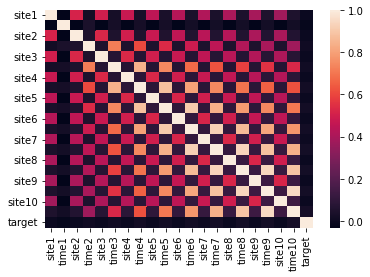

In [103]:
sns.heatmap(df.corr())

In [108]:
plt.figure(figsize=(10,16))
sns.countplot(x='time1',hue='target',data=df)

KeyboardInterrupt: 

<Figure size 720x1152 with 0 Axes>

In [109]:
df

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,1392890565,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,890,1393067990,941,1393067990,3847,1393067991,941,1393067991,942,1393067991,...,1393067991,3847,1393067992,3846,1393067992,1516,1393068015,1518,1393068016,0
3,14769,1387212017,39,1387212018,14768,1387212019,14769,1387212019,37,1387212019,...,1387212019,14768,1387212020,14768,1387212021,14768,1387212022,14768,1387212024,0
4,782,1396003932,782,1396003962,782,1396003992,782,1396004022,782,1396004052,...,1396004082,782,1396004112,782,1396004142,782,1396004172,782,1396004202,0
5,22,1393584785,177,1393584922,175,1393584922,178,1393584923,177,1393584923,...,1393584959,175,1393584959,177,1393584959,177,1393585026,178,1393585031,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253557,3474,1385375214,3474,1385375218,141,1385375223,2428,1385375224,106,1385375233,...,1385375236,2428,1385375248,2428,1385375260,2428,1385375272,148,1385375273,0
253558,12727,1363104075,12727,1363104076,2215,1363104076,38,1363104077,2215,1363104077,...,1363104077,25444,1363104078,2215,1363104078,23,1363104078,21,1363104078,0
253559,2661,1378994703,15004,1378994710,5562,1378994710,5562,1378994789,5562,1378994790,...,0,0,0,0,0,0,0,0,0,0


In [114]:
from datetime import datetime
ts = int('1392890565')
df['Ym'] = df['time1'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y%m'))

In [115]:
df

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,site7,time7,site8,time8,site9,time9,site10,time10,target,Ym
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,1392890565,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,201402
2,890,1393067990,941,1393067990,3847,1393067991,941,1393067991,942,1393067991,...,3847,1393067992,3846,1393067992,1516,1393068015,1518,1393068016,0,201402
3,14769,1387212017,39,1387212018,14768,1387212019,14769,1387212019,37,1387212019,...,14768,1387212020,14768,1387212021,14768,1387212022,14768,1387212024,0,201312
4,782,1396003932,782,1396003962,782,1396003992,782,1396004022,782,1396004052,...,782,1396004112,782,1396004142,782,1396004172,782,1396004202,0,201403
5,22,1393584785,177,1393584922,175,1393584922,178,1393584923,177,1393584923,...,175,1393584959,177,1393584959,177,1393585026,178,1393585031,0,201402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253557,3474,1385375214,3474,1385375218,141,1385375223,2428,1385375224,106,1385375233,...,2428,1385375248,2428,1385375260,2428,1385375272,148,1385375273,0,201311
253558,12727,1363104075,12727,1363104076,2215,1363104076,38,1363104077,2215,1363104077,...,25444,1363104078,2215,1363104078,23,1363104078,21,1363104078,0,201303
253559,2661,1378994703,15004,1378994710,5562,1378994710,5562,1378994789,5562,1378994790,...,0,0,0,0,0,0,0,0,0,201309


<AxesSubplot:xlabel='Ym', ylabel='count'>

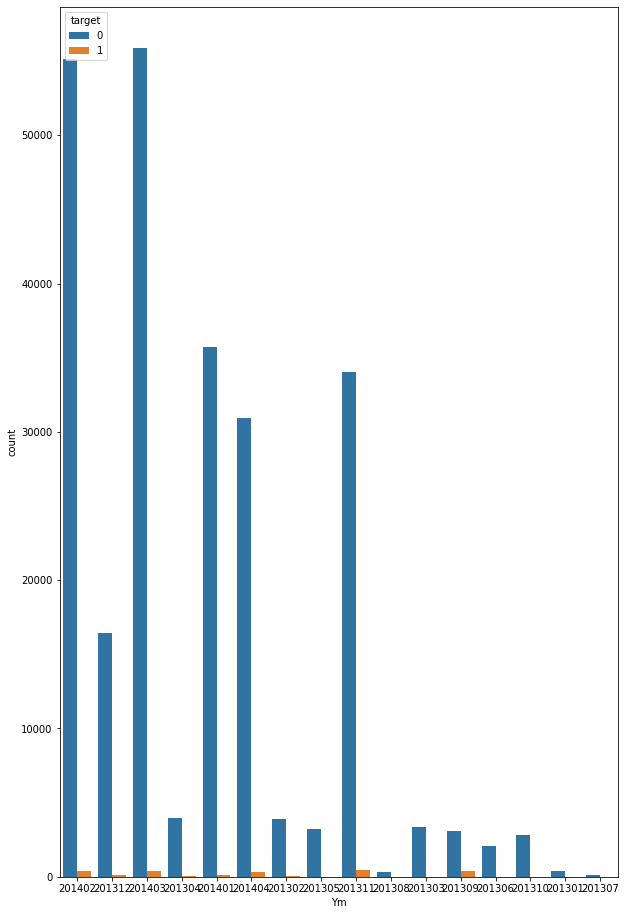

In [116]:
plt.figure(figsize=(10,16))
sns.countplot(x='Ym',hue='target',data=df)

<AxesSubplot:>

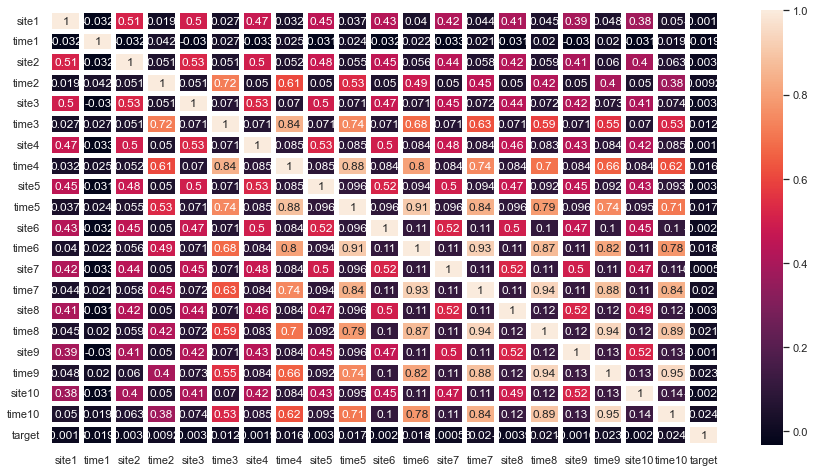

In [117]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(),annot=True, linewidths=4)

In [118]:
models = ['ensemble.BaggingClassifier', 'ensemble.ExtraTreesClassifier', 'ensemble.GradientBoostingClassifier', 'ensemble.RandomForestClassifier', 'ensemble.VotingClassifier', 'ensemble.HistGradientBoostingClassifier', 'gaussian_process.GaussianProcessClassifier', 'linear_model.PassiveAggressiveClassifier', 'linear_model.RidgeClassifier', 'linear_model.RidgeClassifierCV', 'linear_model.SGDClassifier', 'multiclass.OneVsRestClassifier', 'multiclass.OneVsOneClassifier', 'multiclass.OutputCodeClassifier', 'multioutput.ClassifierChain', 'multioutput.MultiOutputClassifier', 'neighbors.KNeighborsClassifier', 'neighbors.RadiusNeighborsClassifier', 'neural_network.MLPClassifier', 'semi_supervised.SelfTrainingClassifier', 'tree.DecisionTreeClassifier', 'tree.ExtraTreeClassifier']
# BaggingClassifier   0.964873765093304
# ExtraTreesClassifier   0.9802414928649835
# GradientBoostingClassifier   0.9396267837541163
# RandomForestClassifier   0.9802414928649835
# HistGradientBoostingClassifier   0.9560922063666301
# GaussianProcessClassifier   0.4983534577387486
# PassiveAggressiveClassifier   0.49286498353457736
# RidgeClassifier   0.6070252469813392
# RidgeClassifierCV   0.4138309549945115
# SGDClassifier   0.49286498353457736
# KNeighborsClassifier   0.9517014270032931
# MLPClassifier   0.49286498353457736
# DecisionTreeClassifier   0.9560922063666301
# ExtraTreeClassifier   0.9527991218441273

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [124]:
y = df['target']
x = df.drop(['target'],axis=1)

# data = na_zero[na_zero['target'] == 1]
# data = data.append(na_zero[na_zero['target'] == 0][:2297])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [125]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9963323013822886